In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from functions import *
from skimage import color
from PIL import Image
from importlib import reload
import os

In [2]:
def toInt(img):
    assert img.max()<=1
    return (img*255).astype(np.uint8)

In [16]:
im=plt.imread('places-test/Places365_val_%08d.jpg'%33)/255
lab=color.rgb2yuv(im)
ende=bins2yuv(yuv2bins(lab[:,:,1:]),lab[:,:,:1])
reconst=np.clip(color.yuv2rgb(ende),0,1)

In [42]:
import functions
bins2yuv =reload(functions).bins2yuv
im=plt.imread('places-test/Places365_val_%08d.jpg'%33)/255
lab=color.rgb2lab(im)
labbins=torch.load('resources/lab_bins.pt').numpy()[None,...]
ende=bins2yuv(yuv2bins(lab[:,:,1:],labbins),lab[:,:,:1],bins=labbins)
labrec=np.clip(color.lab2rgb(ende),0,1)

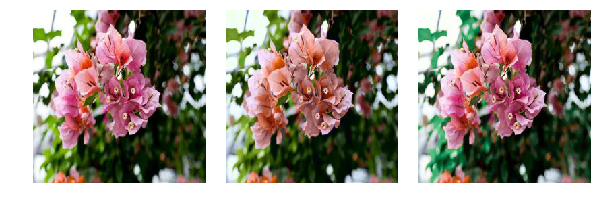

In [43]:
plt.figure(figsize=(10,4))
pix=(np.hstack((im,np.ones((256,30,3)),reconst,np.ones((256,30,3)),labrec))*255).astype(np.uint8)
plt.imshow(pix)
plt.axis('off')
#plt.title('Demonstration of sufficient bottelneck dimensionality')
#plt.savefig('figures/bottelneckdemo.pdf')
plt.show()

In [44]:
Image.fromarray(toInt(labrec)).save('figures/bin-reconstruction-lab150.png')

In [3]:
from functions import load_trainset
stl = load_trainset('../stl-10',train = False,lab = False)

Files already downloaded and verified


In [91]:
good=[3945,7869,6159,2209,7828,4351,7131,652,7791]
bad=[6400,213,6245,6176,1521,664,6465]
comparison=[6940,2499,997,4721,4830,3237,6020,1929,7046,7773,2873,2758,6739]

In [98]:
for i in bad:
    with torch.no_grad():
        img = stl[i]
        or_img = img.numpy().transpose(1,2,0)
        Image.fromarray(toInt(or_img)).save('figures/bad/%05d.png'%i)
        '''plt.imshow(or_img) #gray_image[0][0].detach().numpy(),cmap='gray')
        plt.axis('off')
        plt.show()'''

6400
213
6245
6176
1521
664
6465


In [99]:
path='figures/bad/%s'%'gray'
file_list = sorted(list(set(os.listdir(path))))
file_list = [os.path.join(path, f) for f in file_list if os.path.isfile(os.path.join(path, f))]
col=[]
for f in file_list:
    #col.append(np.asarray(Image.open(f)))
    transforms.Grayscale(3)(Image.open(f)).save(f)

In [38]:
cols=[]
for s in ['gray','','lab150','lab340']:
    path='figures/class_show/%s'%s
    file_list = sorted(list(set(os.listdir(path))))
    file_list = [os.path.join(path, f) for f in file_list if os.path.isfile(os.path.join(path, f))]
    col=[]
    for f in file_list:
        col.append(np.asarray(Image.open(f)))
    col=np.vstack(col)
    cols.append(col)
cols=np.hstack(cols)

In [85]:
new_cols=[]
del_indices=[0,1,3,7,11]
for i in range(len(cols)//96):
    if not i in del_indices:
        new_cols.append(cols[96*i:96*(i+1)])
new_cols=np.vstack(new_cols)

In [86]:
a,b=np.vsplit(new_cols,2)
new_cols=np.hstack((a,np.zeros((a.shape[0],5,3)).astype(np.uint8),b))

In [87]:
pilsize=transforms.Compose([transforms.ToPILImage(),transforms.Resize(800)])

In [89]:
pilsize(new_cols).save('figures/150vs340.png')

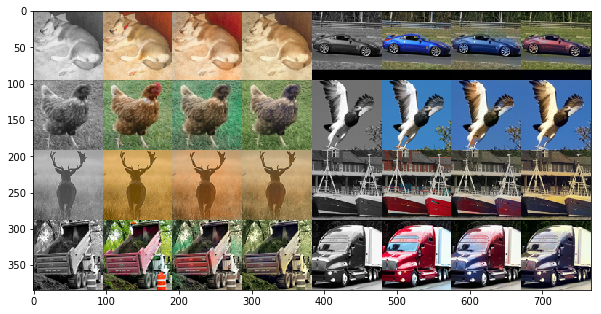

In [67]:
plt.figure(figsize=(10,100))
plt.imshow(new_cols)

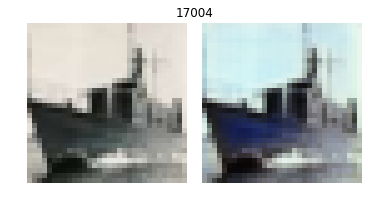

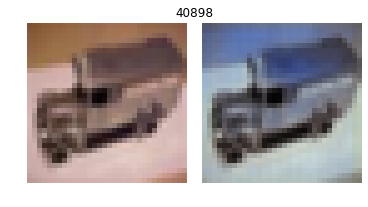

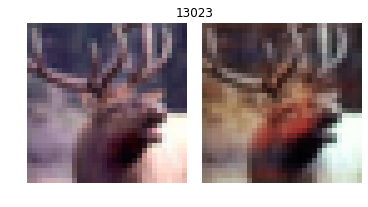

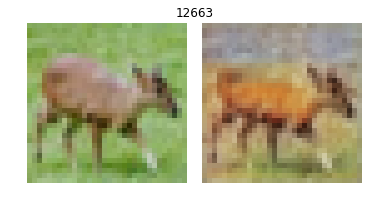

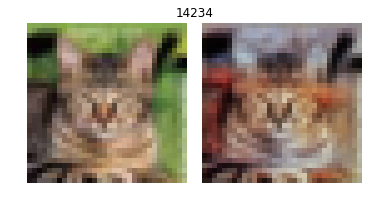

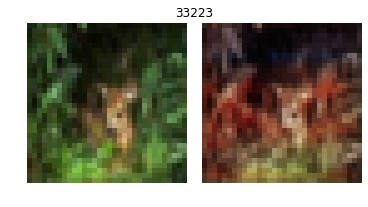

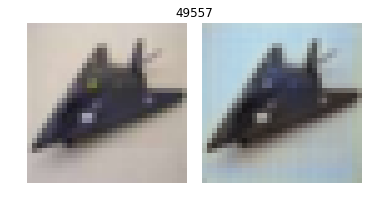

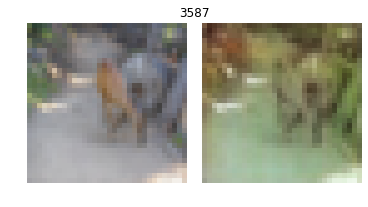

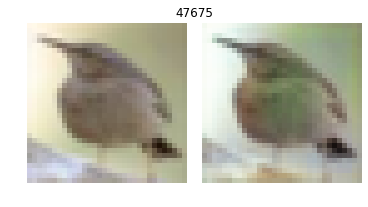

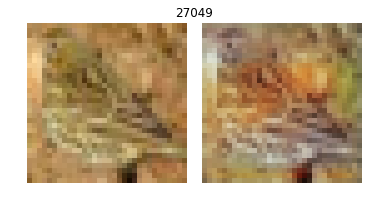

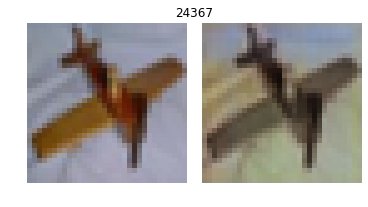

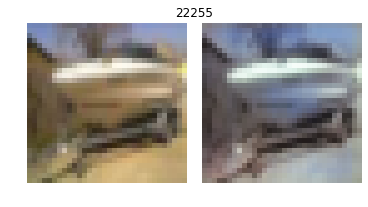

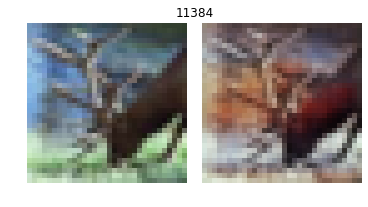

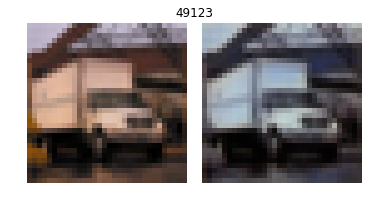

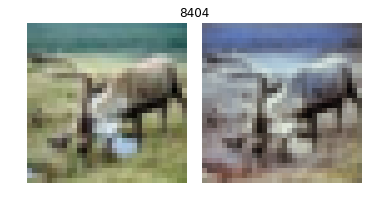

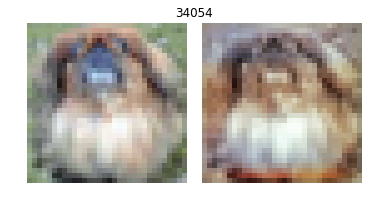

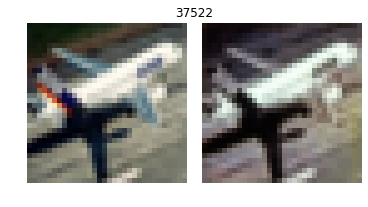

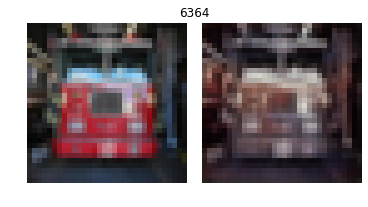

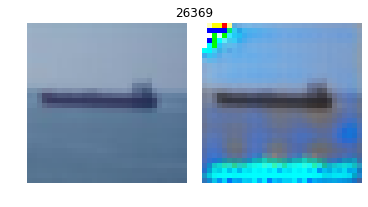

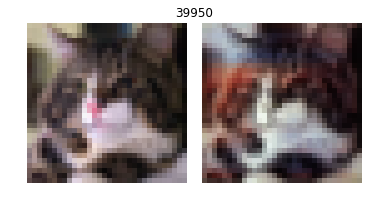

In [56]:
for i in np.random.permutation(len(stl))[:20]:
    plt.figure()
    im=stl.data[i]
    uout=np.asarray(transforms.ToPILImage()(u(prep(im)[None,...])[0]))
    plt.imshow(np.hstack((im,255*np.ones((32,3,3)),uout)).astype(np.uint8))
    plt.title(i)
    plt.axis('off')

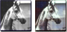

In [46]:
Image.fromarray(np.hstack((im,255*np.ones((32,3,3)),uout)).astype(np.uint8))

In [64]:
item=7634
res=transforms.Resize(480,interpolation=0)
res(transforms.Compose([transforms.ToPILImage(),transforms.Grayscale(1)])(stl.data[item])).save('figures/Cifar_gan_gray.png')
res(Image.fromarray(stl.data[item])).save('figures/Cifar_gan_orig.png')
res(Image.fromarray(np.asarray(transforms.ToPILImage()(u(prep(stl.data[item])[None,...])[0])))).save('figures/Cifar_gan_col.png')

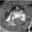

In [58]:
transforms.Compose([transforms.ToPILImage(),transforms.Grayscale(1)])(stl.data[0]).stl

In [4]:
from models.middle_unet import middle_unet

In [41]:
u=unet(classes=3)
u.load_state_dict(torch.load('weights/bigunetganrgb.pth'))
u.eval()

unet(
  (input): double_conv(
    (double_conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
    )
  )
  (contract1): double_conv_pool(
    (pool_layer): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (double_conv): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inpla

In [27]:
prep=transforms.Compose([transforms.ToPILImage(),transforms.Grayscale(1),transforms.ToTensor()])

In [29]:
prep(im)

torch.Size([1, 32, 32])

In [34]:
np.asarray(transforms.ToPILImage()(u(prep(im)[None,...])[0]))

array([[[182, 254, 217],
        [254, 254,  79],
        [254, 215,   0],
        ...,
        [188, 184, 128],
        [194, 213, 166],
        [193, 204, 171]],

       [[242, 254, 252],
        [  0,   0, 254],
        [  0,   0, 252],
        ...,
        [167, 181, 169],
        [172, 198, 136],
        [183, 195, 155]],

       [[254, 252, 237],
        [254, 254, 255],
        [  0, 230,   0],
        ...,
        [199, 207, 179],
        [160, 178, 123],
        [148, 161, 118]],

       ...,

       [[130, 133, 122],
        [125, 139, 152],
        [123, 141, 190],
        ...,
        [ 49,  88,  24],
        [ 50,  76,  20],
        [ 56,  69,  27]],

       [[140, 148, 138],
        [130, 143, 166],
        [112, 160, 206],
        ...,
        [ 50,  77,  17],
        [ 58,  73,  18],
        [ 75,  82,  34]],

       [[133, 142, 132],
        [122, 132, 148],
        [113, 136, 185],
        ...,
        [ 69,  85,  34],
        [ 71,  80,  32],
        [ 68,  69,  37]]